In [2]:
import os
import pandas as pd

# Define the dataset directory
data_dir = '/Users/lucky/GitHub/DDoS-Hybrid-Detection-System/datasets/cic_ids_2019'

# Initialize an empty list to store dataframes
dataframes = []

# Flag to indicate if the header should be included
include_header = True

# Walk through the directory and load each CSV file into a dataframe
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                if include_header:
                    # Read the CSV with the header
                    df = pd.read_csv(file_path)
                    include_header = False  # Don't include the header for the next files
                else:
                    # Read the CSV without the header
                    df = pd.read_csv(file_path, header=None, skiprows=1)
                    df.columns = dataframes[0].columns  # Ensure columns match the first dataframe
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:21: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544787738.py:25: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_63497/3544

In [22]:
# Display basic information about the combined dataframe
print(combined_df.info())
print(combined_df.head())

# Save the combined dataframe to a new CSV file if needed
combined_df.to_csv('/Users/lucky/GitHub/DDoS-Hybrid-Detection-System/datasets/combined_cic_ids_2019.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70427637 entries, 0 to 70427636
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length M

['DrDoS_NTP' 'BENIGN' 'Syn' 'DrDoS_DNS' 'TFTP' 'UDP-lag' 'WebDDoS'
 'DrDoS_SSDP' 'DrDoS_NetBIOS' 'DrDoS_MSSQL' 'DrDoS_UDP' 'DrDoS_LDAP'
 'DrDoS_SNMP' 'LDAP' 'MSSQL' 'UDP' 'UDPLag' 'NetBIOS' 'Portmap']


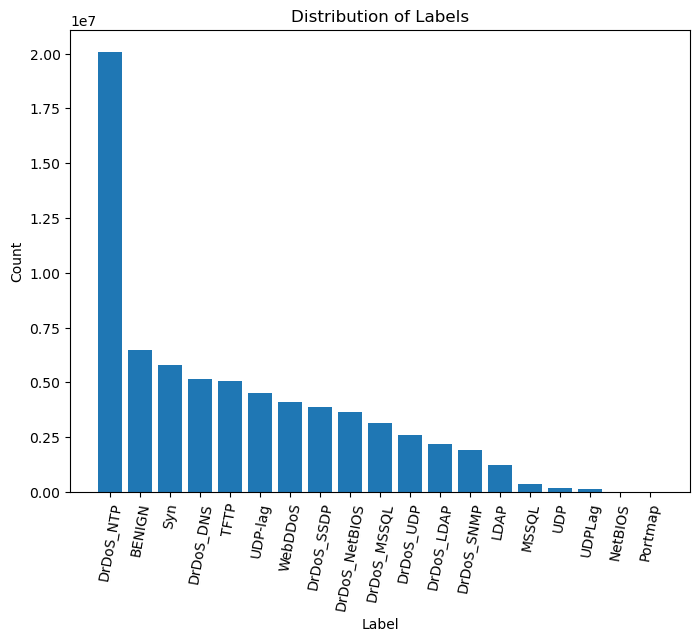

In [21]:
import matplotlib.pyplot as plt

# Get value counts and sort index to maintain order
label_counts = combined_df[' Label'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(12, 8))
plt.title('Distribution of Labels for 03-11 Day')
plt.xlabel('Label')
plt.ylabel('Count')
plt.bar(label_counts.index, label_counts.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# Label Counts for Each Label - Original
label_counts = combined_df[' Label'].value_counts()
print(label_counts)

 Label
TFTP             20082580
Syn               6473789
MSSQL             5787453
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
UDP               3867155
NetBIOS           3657497
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
DrDoS_LDAP        2179930
LDAP              1915122
DrDoS_NTP         1202642
UDP-lag            366461
Portmap            186960
BENIGN             113828
UDPLag               1873
WebDDoS               439
Name: count, dtype: int64


In [24]:
# Removal of Duplicate Rows
combined_df.drop_duplicates(inplace=True)
label_counts_no_duplicates = combined_df[' Label'].value_counts()

 Label
TFTP             20082580
Syn               6007892
MSSQL             5787453
DrDoS_SNMP        5159870
DrDoS_DNS         5071011
DrDoS_MSSQL       4522492
DrDoS_NetBIOS     4093279
UDP               3867155
NetBIOS           3657497
DrDoS_UDP         3134645
DrDoS_SSDP        2610611
DrDoS_LDAP        2179930
LDAP              1915122
DrDoS_NTP         1202642
UDP-lag            366461
Portmap            186960
BENIGN             109424
UDPLag               1873
WebDDoS               439
Name: count, dtype: int64
['DrDoS_NTP' 'BENIGN' 'Syn' 'DrDoS_DNS' 'TFTP' 'UDP-lag' 'WebDDoS'
 'DrDoS_SSDP' 'DrDoS_NetBIOS' 'DrDoS_MSSQL' 'DrDoS_UDP' 'DrDoS_LDAP'
 'DrDoS_SNMP' 'LDAP' 'MSSQL' 'UDP' 'UDPLag' 'NetBIOS' 'Portmap']


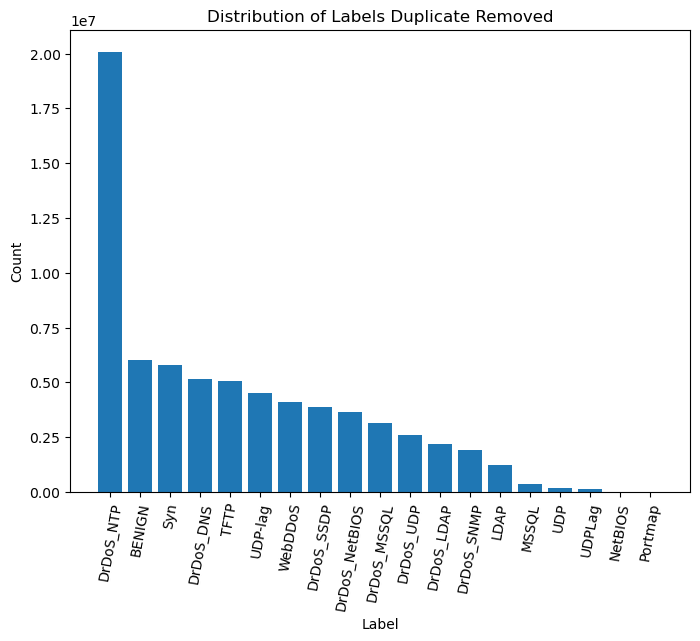

In [25]:
print(label_counts_no_duplicates)

# Plot the distribution of the 'Label' column
plt.figure(figsize=(8, 6))
plt.title('Distribution of Labels Duplicate Removed')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.bar(label_counts_no_duplicates.index, label_counts_no_duplicates.values)

print(combined_df[' Label'].unique())

In [1]:
# Analyze 1 Day of Data
import os
import pandas as pd

# Define the dataset directory
data_dir = '/Users/lucky/GitHub/DDoS-Hybrid-Detection-System/datasets/cic_ids_2019/03-11'

# Initialize an empty list to store dataframes
dataframes = []

# Flag to indicate if the header should be included
include_header = True

# Walk through the directory and load each CSV file into a dataframe
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            try:
                if include_header:
                    # Read the CSV with the header
                    df = pd.read_csv(file_path)
                    include_header = False  # Don't include the header for the next files
                else:
                    # Read the CSV without the header
                    df = pd.read_csv(file_path, header=None, skiprows=1)
                    df.columns = dataframes[0].columns  # Ensure columns match the first dataframe
                dataframes.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, ignore_index=True)

/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:22: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:26: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:26: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277450067.py:26: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None, skiprows=1)
/var/folders/cs/q9gsmhxd20v2qj9n_hb2hv8m0000gn/T/ipykernel_17660/4277

In [11]:
# Show Label Counts for Each Label
label_counts = combined_df[' Label'].value_counts()
print(label_counts)

 Label
2    5584471
5    4129998
6    3790298
3    3515894
1    1872139
4     177197
0      51956
7       1873
Name: count, dtype: int64


In [14]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19123826 entries, 0 to 20364524
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min   

<BarContainer object of 8 artists>

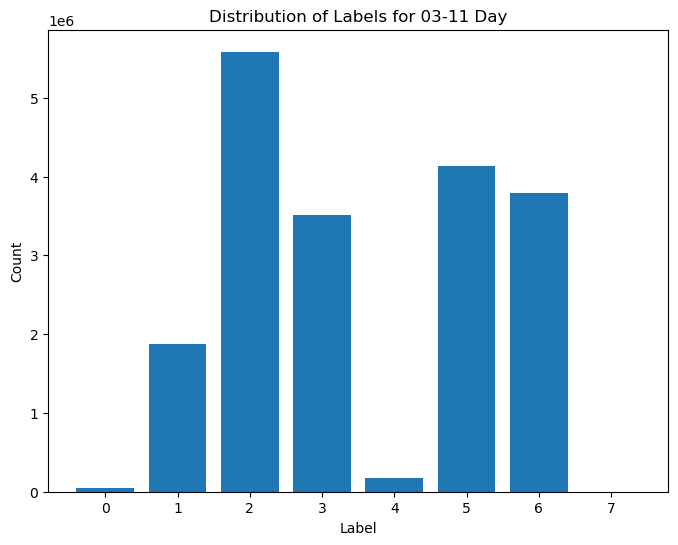

In [12]:
# Show the data distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title("Distribution of Labels for 03-11 Day")
plt.xlabel("Label")
plt.ylabel("Count")
plt.bar(label_counts.index, label_counts.values)

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

def prepare_norm_balanced_data(df, top_features=[], random_state=42, columns_to_remove=[], test_size=0.25, remove_duplicates=True, modify_inplace=True):
    """ Prepares the data for training and testing.

    Args:
        df: pandas DataFrame.
        top_features: List of top features to select.
        random_state: int, default=42.
        test_size: float, default=0.25.
        remove_duplicates: bool, default=True.
        modify_inplace: bool, default=False. If True, modifies the DataFrame in-place.

    Returns:
        x_train_scaled: pandas DataFrame (scaled training data).
        x_test_scaled: pandas DataFrame (scaled testing data).
        y_train: pandas Series (training labels).
        y_test: pandas Series (testing labels).
        label_mapping: dict (label encoding mapping).
    """

    if not modify_inplace:
        df = df.copy()  # Work on a copy if in-place modification is not desired

    # Data Cleaning
    if remove_duplicates:
        df.drop_duplicates(keep='first', inplace=True)

    df.dropna(subset=[' Label'], inplace=True) 
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Columns to Remove 
    if len(columns_to_remove) > 0:
        df.drop(columns=columns_to_remove, inplace=True)

    # Label Encoding
    if df[' Label'].dtype == 'object':
        label_encoder = LabelEncoder()
        df[' Label'] = label_encoder.fit_transform(df[' Label'])
        label_mapping = {idx: label for idx, label in enumerate(label_encoder.classes_)}
    else:
        label_mapping = None

    # Feature Selection and Data Split
    if len(top_features) > 0:
        X = df[top_features]
    else:
        X = df.drop(columns=[' Label'])
    y = df[' Label']

    # Normalization and Split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    return pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index), \
           pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index), \
           y_train, y_test, label_mapping

In [19]:
columns_to_remove = [
    'Unnamed: 0', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp'
]

x_train,x_test, y_train, y_test, label_map = prepare_norm_balanced_data(combined_df, random_state=42, columns_to_remove=columns_to_remove, test_size=0.3, remove_duplicates=True, modify_inplace=True)

In [ ]:
# fit balanced xgboost on an imbalanced classification dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier


# define model
model = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))